<a href="https://colab.research.google.com/github/malmusfer/SQL-Query-a-Digital-Music-Store/blob/main/Query_a_Digital_Music_Store_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](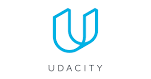 "Udacity") ![alt text](https://www.arabcoders.ae/frontend_v3/assets/img/logo.png "1M Arab Coders") 




# Data Analysis Track

## Mini-porject: SQL Query a Digital Music Store - Part II
## by: Almutairi, Muhanned
![alt text](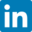 "LinkedIn profile")[LinkedIn profile](https://www.linkedin.com/in/muhanned-almutairi-5bb1a5a0/)

#Chinook Database

###Introduction

In this mini-project, we will query the Chinook Database. The Chinook Database holds information about a music store. For this lab, we will be answering 5 queries to help the Chinook team understand the media in their store, their customers and employees, and their invoice information. To assist us in the queries ahead, the schema for the Chinook Database is provided below. We can see the columns that link tables together via the arrows.



![alt text](https://video.udacity-data.com/topher/2019/February/5c6164bf_chinook/chinook.png "schema") 

#Instructions
"In order to help the team at Chinook music store, We need to answer the following 5 queries

###Q1 Use the Invoice table to determine the countries that have the most invoices. Provide a table of BillingCountry and Invoices ordered by the number of invoices for each country. The country with the most invoices should appear first.



In [ ]:
SELECT billingcountry, Count(*) as number_invoices from Invoice
group by 1
order by 2 desc

###Q2 We would like to throw a promotional Music Festival in the city we made the most money. Write a query that returns the 1 city that has the highest sum of invoice totals. Return both the city name and the sum of all invoice totals.

check our solution

The top city for Invoice dollars was Prague with an amount of 90.24

In [ ]:
SELECT billingcity,sum(total) as invoice_totals from Invoice
group by 1
order by 2 Desc
limit 1

###Q3 The customer who has spent the most money will be declared the best customer. Build a query that returns the person who has spent the most money. I found the solution by linking the following three: Invoice, InvoiceLine, and Customer tables to retrieve this information, but we can probably do it with fewer!

check our solution

The customer who spent the most according to invoices was Customer 6 with 49.62 in purchases.


In [ ]:
SELECT c.CustomerId,
c.FirstName,
c.LastName,
sum(inv.UnitPrice) as invoices
FROM Invoice i
join InvoiceLine inv
on inv.Invoiceid = i.Invoiceid
join customer c
on c.customerid = i.customerid
group by c.CustomerId,c.FirstName,c.LastName
order by i.total desc
limit 1

###Q4 The team at Chinook would like to identify all the customers who listen to Rock music. Write a query to return the email, first name, last name, and Genre of all Rock Music listeners. Return our list ordered alphabetically by email address starting with 'A'.

Check our solution

Our final table should have 59 rows and 4 columns.

In [ ]:
SELECT C.Email,C.FirstName,C.LastName,G.Name
FROM Customer C
Join Invoice I
On C.CustomerId= I.CustomerId
Join InvoiceLine Inv
On I.InvoiceId= Inv.InvoiceId
Join Track T
On T.TrackId = Inv.TrackId
Join Genre G
On G.GenreId = T.GenreId
WHERE G.Name = 'Rock'
group by Email

###Q5 Write a query that determines the customer that has spent the most on music for each country. Write a query that returns the country along with the top customer and how much they spent. For countries where the top amount spent is shared, provide all customers who spent this amount.

We should only need to use the Customer and Invoice tables.

Check our Solution

Though there are only 24 countries, our query should return 25 rows because the United Kingdom has 2 customers that share the maximum."

In [ ]:
with c as(select Invoice.CustomerId as id_cst, Invoice.BillingCountry as Country, sum(Invoice.Total) as som from Invoice
join Customer on Invoice.BillingCountry = Customer.Country and Invoice.CustomerId = Customer.CustomerId
group by 1,2
order by 2 ),
Customers as (select Customer.CustomerId as cust_id, Customer.FirstName as name_customer, Customer.LastName as lastname_customer from Customer)

SELECT customers.cust_id, customers.name_customer,customers.lastname_customer, b.country, b.max_som from Customers,
(SELECT a.country as country, max(a.som) as max_som from
(SELECT Invoice.CustomerId as id_cst, Invoice.BillingCountry as Country, sum(Invoice.Total) as som from Invoice join Customer on Invoice.BillingCountry = Customer.Country and Invoice.CustomerId = Customer.CustomerId
group by 1,2
order by 2 ) as a
group by 1
order by 2 ) as b
join c
on c.country = b.country and c.som = b.max_som
WHERE Customers.cust_id = c.id_cst